# Import setting

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
import matplotlib.pyplot as plt
from datetime import datetime
from typing import Callable, Tuple
from strategies import Strategies
from base_setting import Base_setting
from tool_kits import *
from visualize import visualize
from visualize_v2 import visualize as vs2
from visualize_v3 import visualize as vs3
from performance import *

# Data Preprocessing

In [2]:
df_price = pd.read_csv('df_price.csv')
df_spy = pd.read_csv('df_spy.csv')
df_rf = pd.read_csv('df_rf.csv')

def indexing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index(['Date'])
    return df

df_price = indexing(df_price)
df_spy = indexing(df_spy)
df_rf = indexing(df_rf)

# Backtesting

Explain 3 modules simply

from strategies import Strategies

from base_setting import Base_setting

from visualize import visualize




### What if?

Nice allocation


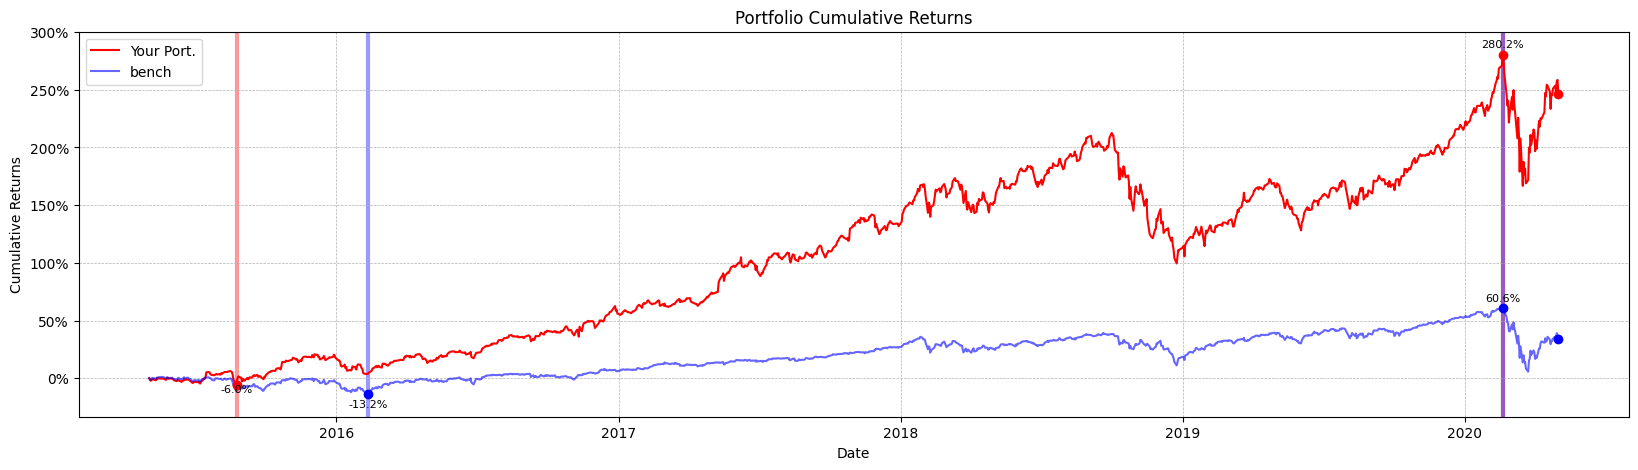

In [3]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-05-01','2020-05-01')

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
osj_setting = Base_setting(data=data,investment_period=i_p,initial_investment=inv)
csy_setting = Base_setting(data,i_p,inv)

# 나 이렇게 살거임!
weight =    {'AAPL' : 0.2,
            'GOOG' : 0.2,
            'PEP' : 0.2,
            'KO' : 0.1,
            'MSFT' : 0.1,
            'NVDA' : 0.1,
            'AMZN' : 0.1  
            }

# 비중 계산 확인 
check_weight_error(weight)
 
# 투자 기간 동안 buy_and_hold 실시한 결과
buy_and_hold_port_return = csy_setting.run_all(weight)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
visualize(buy_and_hold_port_return,bench_return)


### What if? by momemtum strategy

Nice allocation


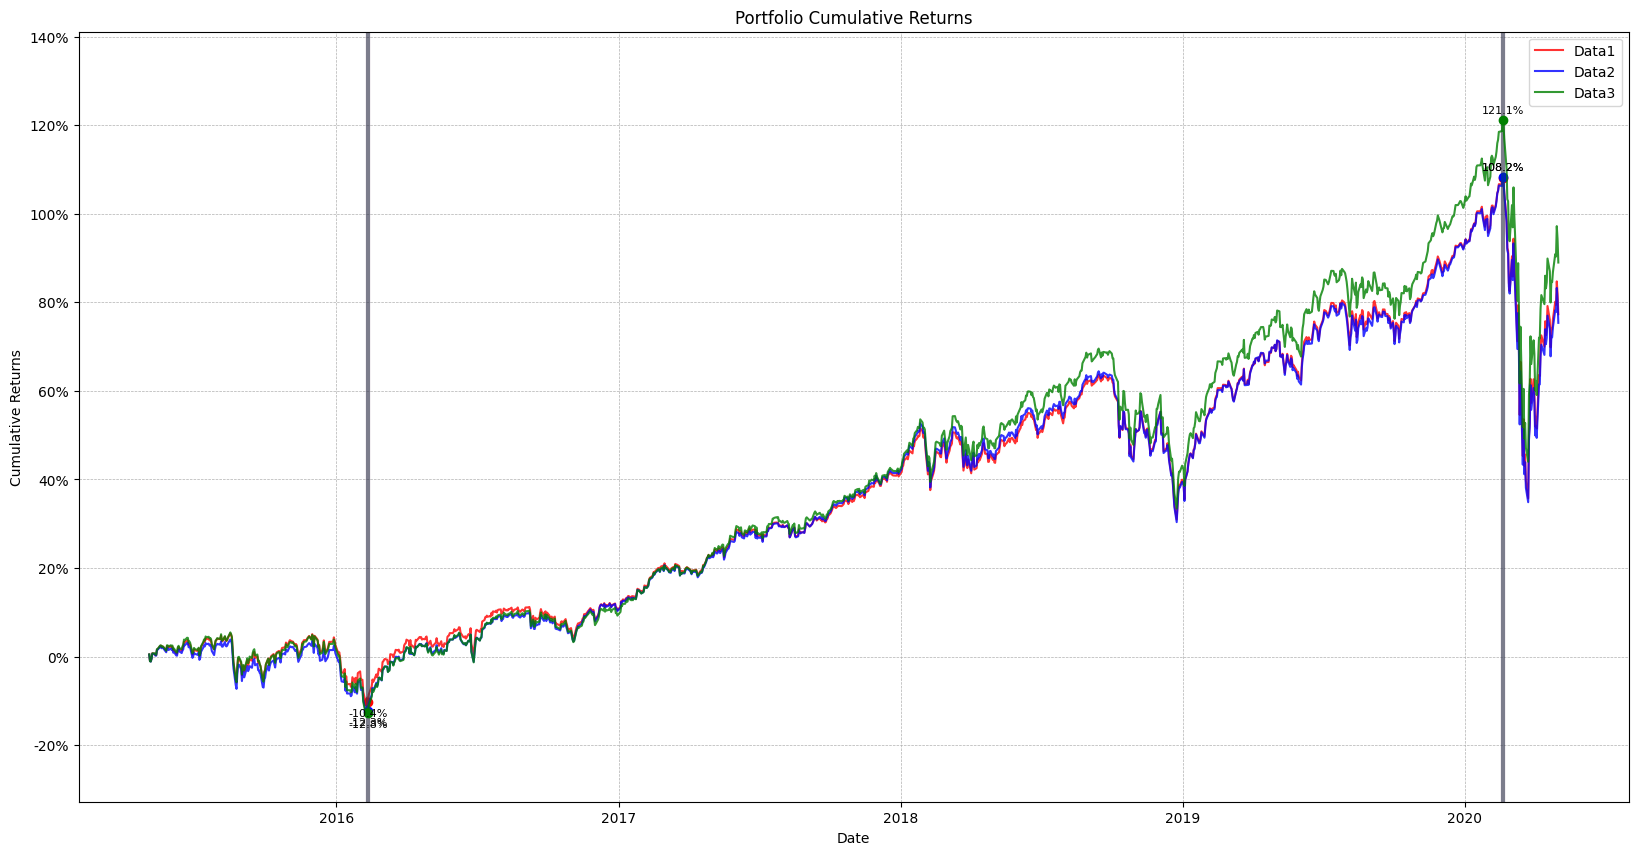

In [4]:
# # 투자 유니버스 가격 데이터
# data = df_price.copy()

# # investment_period = i_p :백테스팅할 투자 기간
# i_p = ('2018-05-01','2022-05-01')

# # initial_investment = 초기 투자 금액
# inv = 10000  # $

# # 객체 할당
# osj_setting = Base_setting(data=data,investment_period=i_p,initial_investment=inv)
# csy_setting = Base_setting(data,i_p,inv)

weight = csy_setting.strategy.momentum_vol_weighted(i_p,252)
weight2 = csy_setting.strategy.momentum_performance_quantile(i_p,252)
weight3 = csy_setting.strategy.momentum_performance_weigthed(i_p,252)

# 비중 계산 확인 
check_weight_error(weight)
 
# 투자 기간 동안 buy_and_hold 실시한 결과
buy_and_hold_mom_port_return = csy_setting.run_all(weight)
buy_and_hold_mom_port_return2 = csy_setting.run_all(weight2)
buy_and_hold_mom_port_return3 = csy_setting.run_all(weight3)
#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 함수
vs2(buy_and_hold_mom_port_return,buy_and_hold_mom_port_return2,buy_and_hold_mom_port_return3)


### your port vs momentum vs bench

In [5]:
# 수동으로 기간에 따른 그래프를 시각화

# for i in range(1,10):
#     ans = input('insert \'y\' to continue')
#     if ans == 'y' :
#         vs3(buy_and_hold_port_return.iloc[:i*126],buy_and_hold_mom_port_return3.iloc[:i*126],bench_return.iloc[:i*126])
#     else:
#         break


# Rebalancing by Algorithm

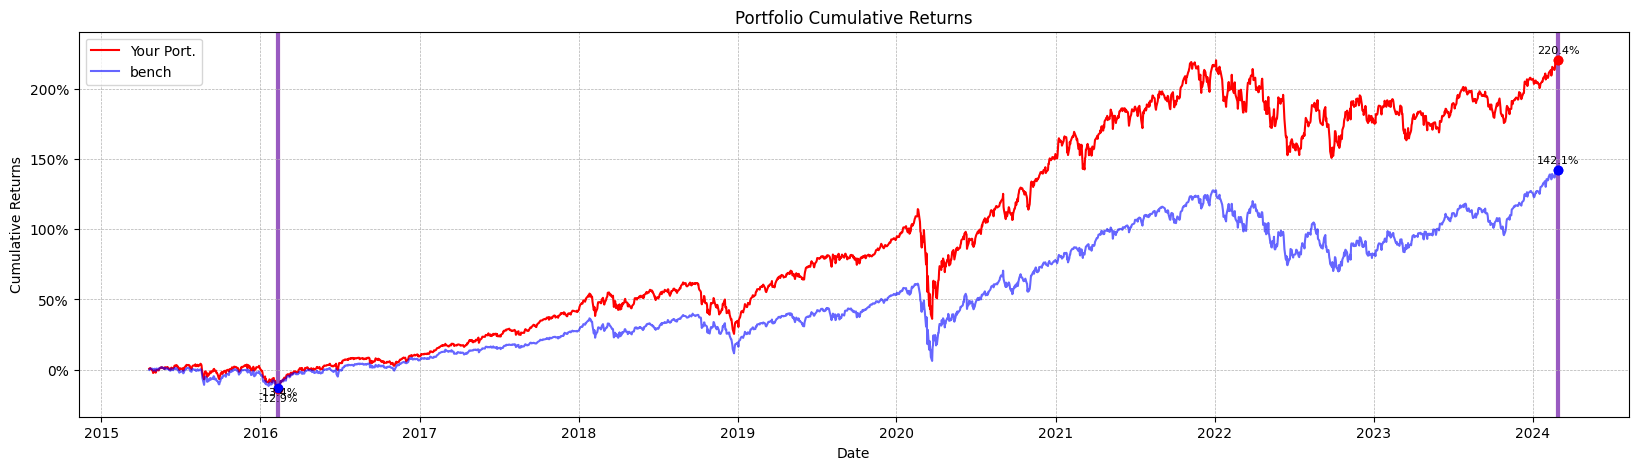

In [6]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-04-20','2016-04-20')

# 리밸런싱 주기
n = 252

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
csy_setting = Base_setting(data,i_p,inv)
 
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return = csy_setting.port_return(rebalanced_port)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_full_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
visualize(rebalanced_port_return,bench_return)


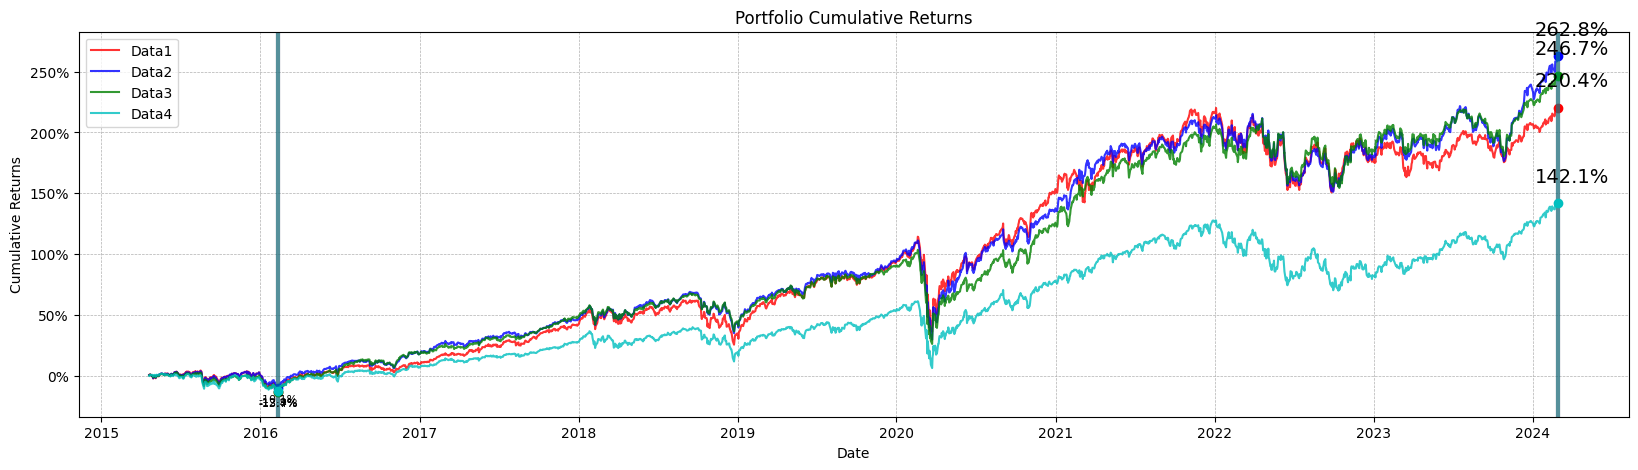

In [7]:
n = 121

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port2 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return2 = csy_setting.port_return(rebalanced_port2)

n = 60
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port3 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return3 = csy_setting.port_return(rebalanced_port3)


# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs3(rebalanced_port_return,rebalanced_port_return2,rebalanced_port_return3,bench_return)


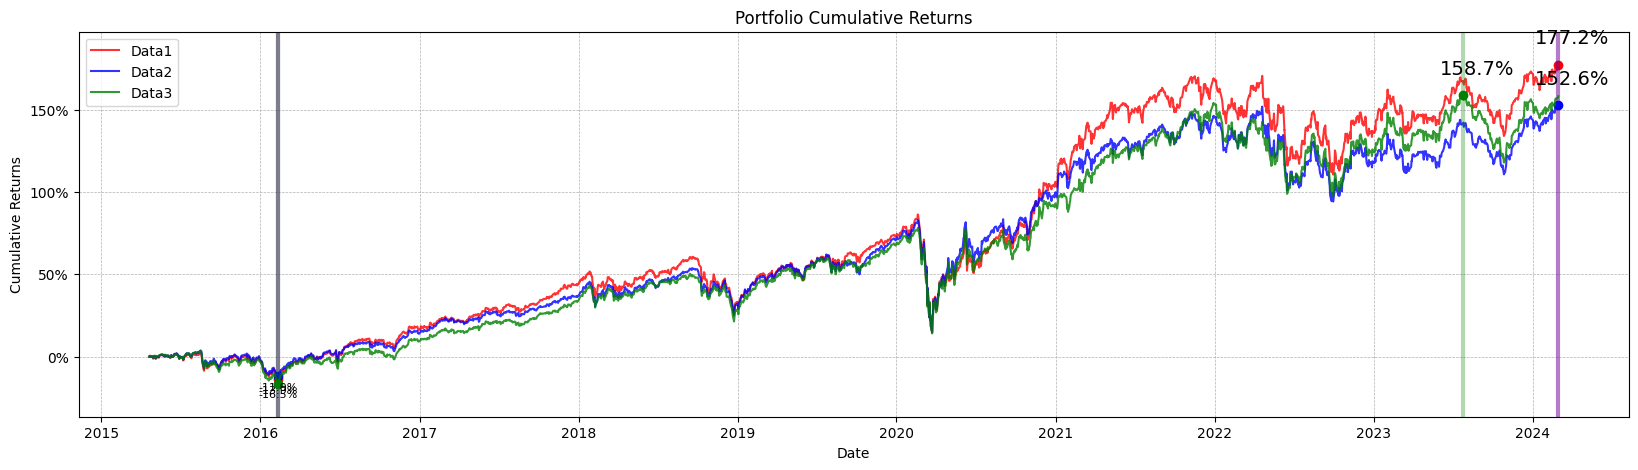

In [8]:
n = 30

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port4 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return4 = csy_setting.port_return(rebalanced_port4)

n = 20
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port5 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return5 = csy_setting.port_return(rebalanced_port5)

n = 10
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port6 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return6 = csy_setting.port_return(rebalanced_port6)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs3(rebalanced_port_return4,rebalanced_port_return5,rebalanced_port_return6)


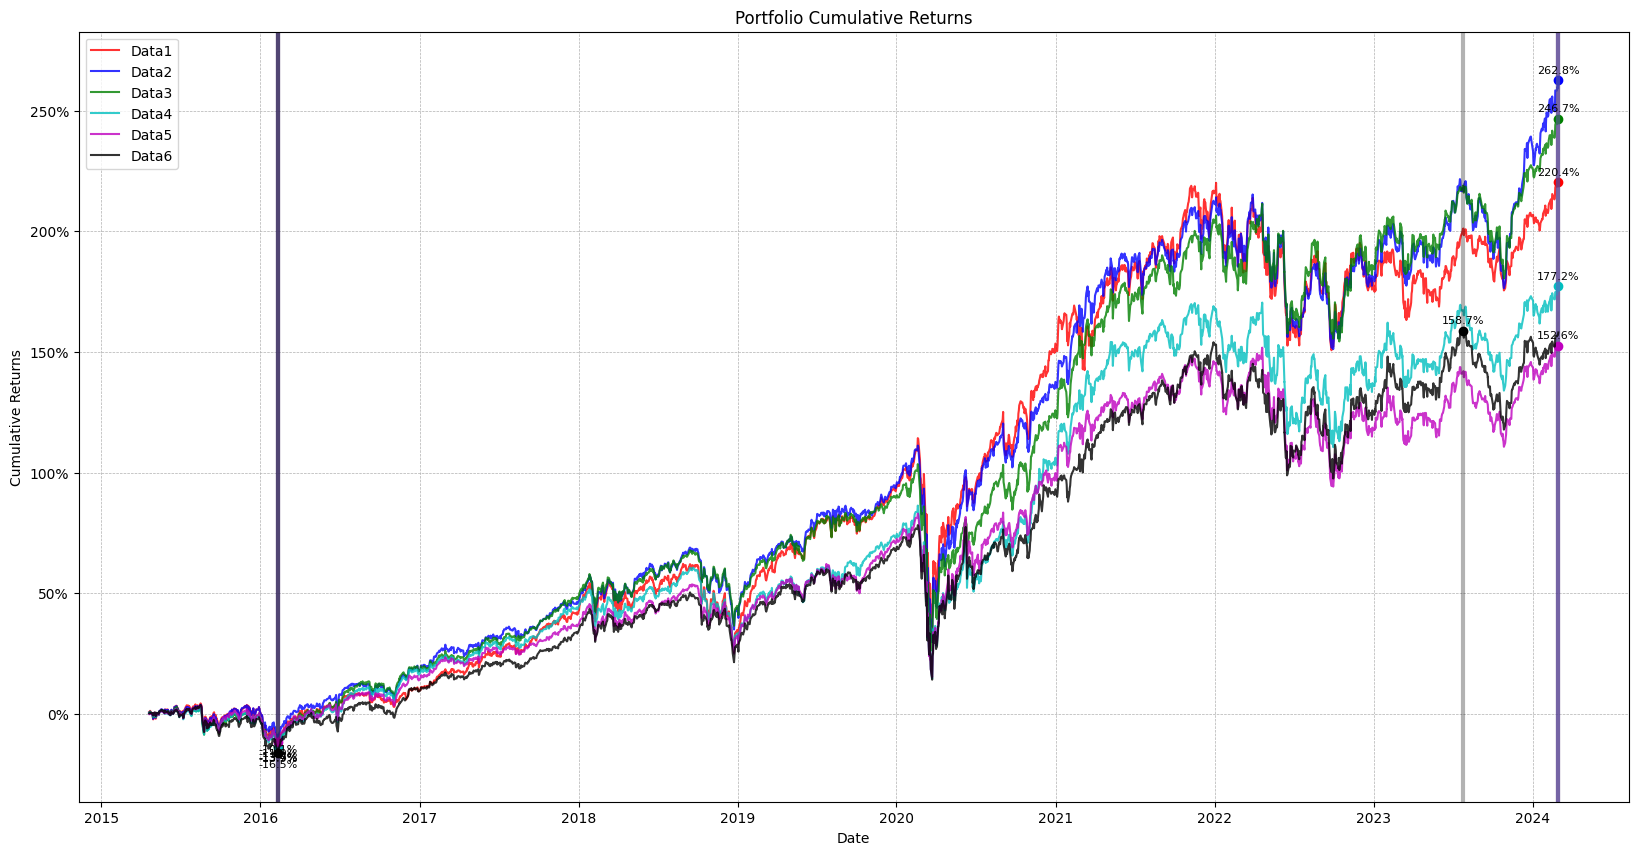

In [9]:
vs2(rebalanced_port_return,rebalanced_port_return2,rebalanced_port_return3,rebalanced_port_return4,rebalanced_port_return5,rebalanced_port_return6)

# Rebalance by my hand

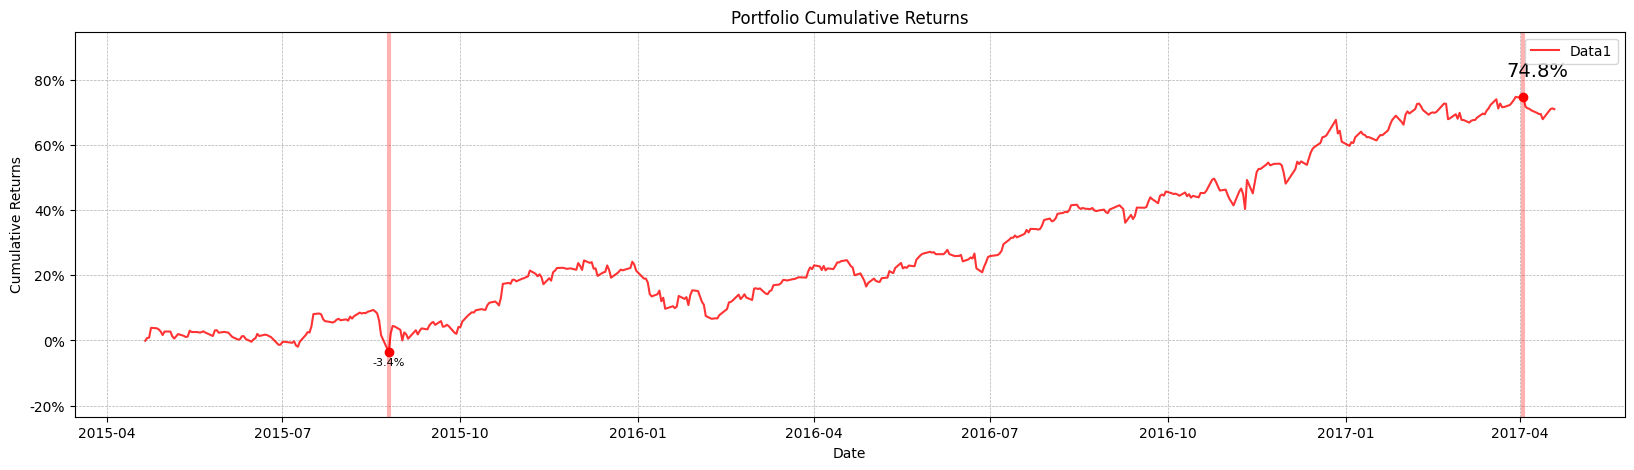

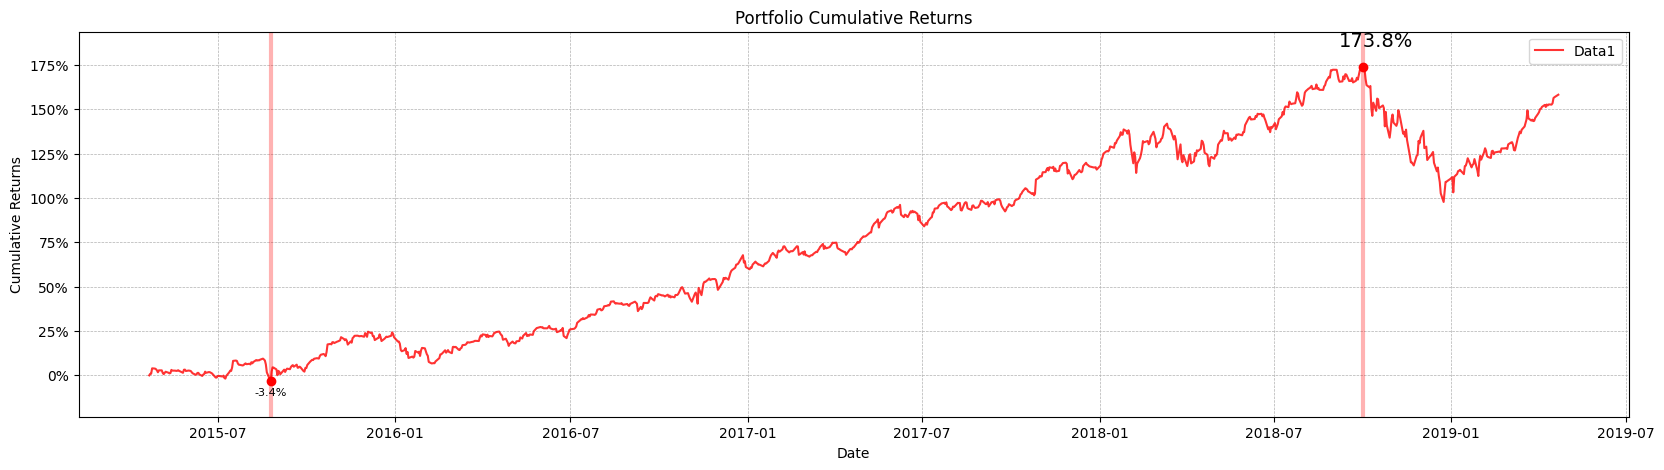

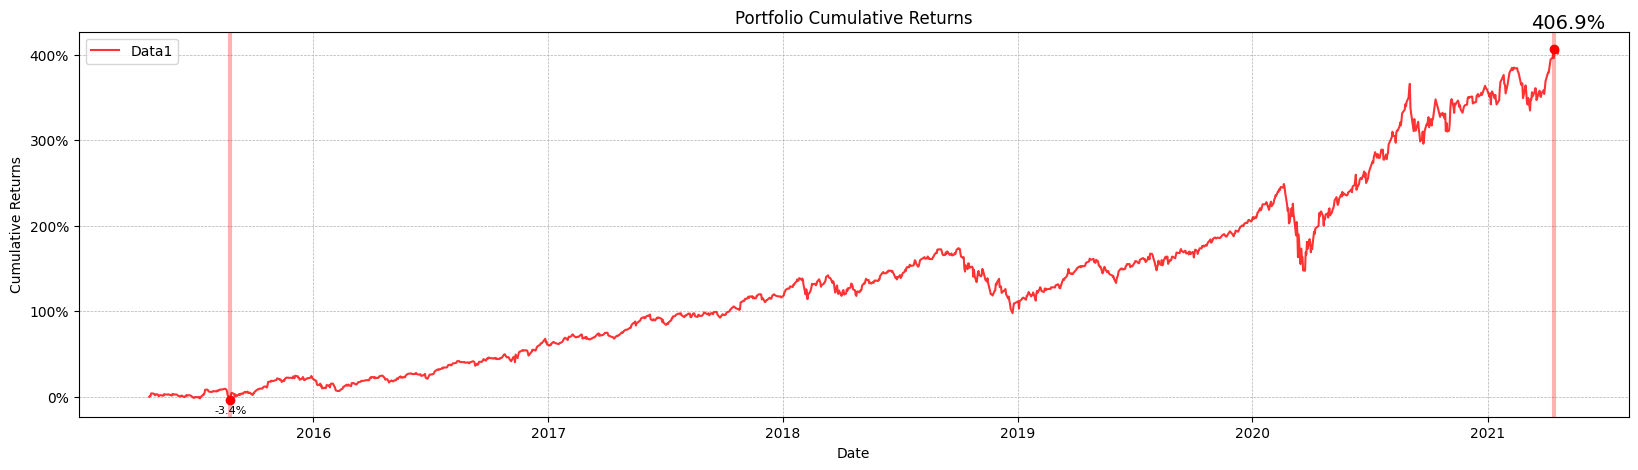

In [12]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-04-20','2016-04-20')

# 리밸런싱 기간 
n = 504

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
csy_setting = Base_setting(data,i_p,inv)
 
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port = csy_setting.by_hand_rebalancing(window=n)

# 나 이렇게 살거임!
'''
{'AAPL' : 0.2,
'GOOG' : 0.2,
'PEP' : 0.2,
'KO' : 0.1,
'MSFT' : 0.1,
'NVDA' : 0.1,
'AMZN' : 0.1  
}
'''
rebalanced_port_return = csy_setting.port_return(rebalanced_port)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_full_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
#visualize(rebalanced_port_return,bench_return)



# Performance comparing

In [21]:
rebalanced_port.tail()

,IQV,AMCR,TECH,XRAY,VFC,TRMB,APTV,ZION,ANSS,MMM,...,ARE,ZTS,STE,TSCO,MSCI,APA,LLY,HLT,ICE,Total_value
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,82884.123
2024-02-26,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,82097.606
2024-02-27,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,82121.142
2024-02-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,81375.707
2024-02-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,82078.665


In [19]:
total_value_series = rebalanced_port['Total_value']
cagr = calculate_cagr(total_value_series)
mdd = calculate_mdd(total_value_series)
total_return_serires = rebalanced_port_return['Total_return']
sharpe = calculate_sharpe_ratio(total_return_serires,df_rf=df_rf)

In [22]:
performance_dict = {'CAGR' : cagr,
                    'MDD' : mdd[0],
                    'SHARPE' : sum([item[2] for item in sharpe])/len([item[2] for item in sharpe])}

perform = pd.DataFrame(index=(0,1),data=performance_dict)

perform

,CAGR,MDD,SHARPE
0,0.268,-0.293,1.226
1,0.268,-0.293,1.226
